# TF Reegression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0, 10, 1000000)

In [8]:
noise = np.random.randn(len(x_data))

In [10]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [13]:
y_true = (0.5 * x_data) + 5 + noise

In [15]:
x_df = pd.DataFrame(data=x_data, columns=["X Data"])

In [17]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [18]:
my_data = pd.concat([x_df, y_df], axis=1)

In [20]:
my_data.head()

,X Data,Y
0,0.00000,4.825278
1,0.00001,4.652669
2,0.00002,3.378474
3,0.00003,4.958828
4,0.00004,6.053033


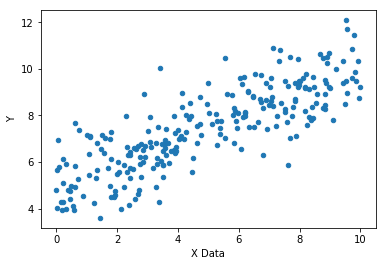

In [23]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")

In [25]:
batch_size = 8

In [26]:
np.random.randn(2)

array([-0.95693784, -0.92605752])

In [28]:
m = tf.Variable(-0.95)
b = tf.Variable(-0.92)

In [29]:
xph = tf.placeholder(tf.float32, [batch_size])

In [30]:
yph = tf.placeholder(tf.float32, [batch_size])

In [31]:
y_model = m*xph + b

In [32]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [35]:
train = optimizer.minimize(error)

In [36]:
init = tf.global_variables_initializer()

In [60]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])
        

In [61]:
model_m

0.51134294

In [62]:
model_b

5.028019

In [52]:
y_hat = x_data*model_m + model_b

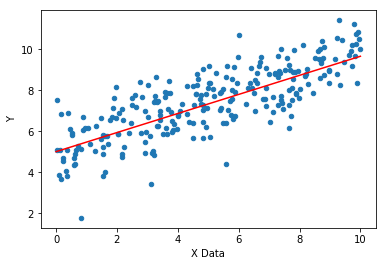

In [53]:
my_data.sample(250).plot(kind="scatter", x="X Data", y="Y")
plt.plot(x_data, y_hat, "r")